In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import itertools
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
#from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
#import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [2]:
## To display  all the interactive output without using the print function
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
data=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [4]:
# lowercase column name
data.columns = map(str.lower, data.columns)
data.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [5]:
# customerid not useful better to drop it
data.drop(['customerid'], axis=1, inplace=True)

In [7]:
data['totalcharges'].unique()
#Replacing spaces with null values in total charges column
data['totalcharges'] = data["totalcharges"].replace(" ",np.nan)
data.info()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   multiplelines     7043 non-null   object 
 7   internetservice   7043 non-null   object 
 8   onlinesecurity    7043 non-null   object 
 9   onlinebackup      7043 non-null   object 
 10  deviceprotection  7043 non-null   object 
 11  techsupport       7043 non-null   object 
 12  streamingtv       7043 non-null   object 
 13  streamingmovies   7043 non-null   object 
 14  contract          7043 non-null   object 
 15  paperlessbilling  7043 non-null   object 
 16  paymentmethod     7043 non-null   object 


In [8]:
data.isna().sum()

gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [10]:
print((data['totalcharges'].isna().sum()/len(data))*100) # count the percentage of missing data
#Dropping null values from total charges column which contain .15% missing data 
data.dropna(inplace=True)

0.1561834445548772


In [11]:
# checking missing data
data.isna().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [12]:
#convert to float type
data["totalcharges"] = data["totalcharges"].astype(float)

In [13]:
data['onlinesecurity'].value_counts()
data['onlinebackup'].value_counts()
data['deviceprotection'].value_counts()
data['techsupport'].value_counts()
data['streamingtv'].value_counts()
data['streamingmovies'].value_counts()

No                     3497
Yes                    2015
No internet service    1520
Name: onlinesecurity, dtype: int64

No                     3087
Yes                    2425
No internet service    1520
Name: onlinebackup, dtype: int64

No                     3094
Yes                    2418
No internet service    1520
Name: deviceprotection, dtype: int64

No                     3472
Yes                    2040
No internet service    1520
Name: techsupport, dtype: int64

No                     2809
Yes                    2703
No internet service    1520
Name: streamingtv, dtype: int64

No                     2781
Yes                    2731
No internet service    1520
Name: streamingmovies, dtype: int64

In [14]:
#replace 'No internet service' to No for the following columns
replace_cols = [ 'onlinesecurity', 'onlinebackup', 'deviceprotection',
                'techsupport','streamingtv', 'streamingmovies']
for i in replace_cols : 
    data[i]  = data[i].replace({'No internet service' : 'No'})

In [15]:
data['onlinesecurity'].unique()
data['onlinesecurity'].value_counts()
data['onlinebackup'].value_counts()
data['deviceprotection'].value_counts()
data['techsupport'].value_counts()
data['streamingtv'].value_counts()
data['streamingmovies'].value_counts()

array(['No', 'Yes'], dtype=object)

No     5017
Yes    2015
Name: onlinesecurity, dtype: int64

No     4607
Yes    2425
Name: onlinebackup, dtype: int64

No     4614
Yes    2418
Name: deviceprotection, dtype: int64

No     4992
Yes    2040
Name: techsupport, dtype: int64

No     4329
Yes    2703
Name: streamingtv, dtype: int64

No     4301
Yes    2731
Name: streamingmovies, dtype: int64

In [16]:
# replacing values
data['seniorcitizen']=data['seniorcitizen'].replace({1:'Yes',0:"No"})
data['seniorcitizen'].value_counts()

No     5890
Yes    1142
Name: seniorcitizen, dtype: int64

##### Exploring Categorical Features

In [20]:
### function for plotting caterogical columns
def plot_cat(data,feature, xlabel_rotation=0 ):
    fig, ax = plt.subplots(1, 2, figsize=(14, 4))
    
    # title for first subplot
    ax[0].set(xlabel = f"{feature}", ylabel=f"Number of Customers")
    # title for second subplot
    ax[1].set(xlabel = f"{feature}", ylabel=f"Number of Customers")
    
    # create subplots, parametr rot=0 - shows how we see labels for axes x
    data[data.churn == "No"][feature].value_counts().plot(kind='bar', ax=ax[0], rot=xlabel_rotation).set_title('Non churn customers')
    data[data.churn == "Yes"][feature].value_counts().plot(kind='bar', ax=ax[1], rot=xlabel_rotation).set_title('Churn Customers')
    
    # main title
    # y - how far from plot we put title (if y is small number then title connect with plots, else y is big number then title run away from plot, plot go down the page
    # size - font size for title
    # weight - type of font
    fig.suptitle(f'{feature} distribution in customer attrition', y=1.02, size=16, weight='bold')

In [21]:
# define features
categorical_features=['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']
numerical_features=['tenure','monthlycharges', 'totalcharges']

In [25]:
def find_outliers(col):
    """Use scipy to calcualte absolute Z-scores 
    and return boolean series where True indicates it is an outlier
    Args:
        col (Series):column from my dataFrame
    Returns:
        idx_outliers (Series): series of  True/False for each row in col
        
    Ex:
    >> idx_outs = find_outliers(df['tenure'])
    >> df_clean = df.loc[idx_outs==False]"""
    from scipy import stats
    z = np.abs(stats.zscore(col))
    idx_outliers = np.where(z>3,True,False)
    return pd.Series(idx_outliers,index=col.index)

In [26]:
data['churn'] = data['churn'].apply(lambda x: x.strip().replace("Yes", "1").replace("No", "0"))
data['churn'] = data['churn'].astype('int')

In [27]:
#### onehot encoding all caterogical data
df=pd.get_dummies(data, drop_first=True)


In [29]:
## Define X, y and split data into training and testing
from sklearn.model_selection import train_test_split

# Split data into X and y
y=df['churn'].copy()

# Define X

X = df.drop(columns=['churn'], axis=1)



#importing train_test_split
from sklearn.model_selection import train_test_split
# Split the data into a training and a test set and set stratify=y to help with imbalance data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,
                                                 random_state=42)



In [31]:
### define our metrics function with plotting confusion matrix
import itertools
from sklearn.metrics import confusion_matrix 

### define function for plotting confusion matrix
def plot_confusion_matrix(y_true, y_preds):
    # Print confusion matrix
    cnf_matrix = confusion_matrix(y_true, y_preds)
    # Create the basic matrix
    plt.imshow(cnf_matrix,  cmap=plt.cm.Blues)
    # Add title and axis labels
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # Add appropriate axis scales
    class_names = set(y) # Get class labels to add to matrix
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=0)
    plt.yticks(tick_marks, class_names)
    # Add labels to each cell
    thresh = cnf_matrix.max() / 2. # Used for text coloring below
    # Here we iterate through the confusion matrix and append labels to our visualization
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, cnf_matrix[i, j],
                     horizontalalignment='center',
                     color='white' if cnf_matrix[i, j] > thresh else 'black')
    # Add a legend
    plt.colorbar();
    plt.show();
def metrics(model_name, y_train, y_test, y_hat_train, y_hat_test):
    '''Print out the evaluation metrics for a given models predictions'''
    print(f'Model: {model_name}', )
    print('-'*60)
    plot_confusion_matrix(y_test,y_hat_test)
    print(f'test accuracy: {accuracy_score(y_test, y_hat_test)}')
    print(f'train accuracy: {accuracy_score(y_train, y_hat_train)}')
    print('-'*60)
    print('-'*60)
    print('Confusion Matrix:\n', pd.crosstab(y_test, y_hat_test, rownames=['Actual'], colnames=['Predicted'],margins = True))
    print('\ntest report:\n' + classification_report(y_test, y_hat_test))
    print('~'*60)
    print('\ntrain report:\n' + classification_report(y_train, y_hat_train))
    print('-'*60)

In [32]:
# # Build a  logistic regression base model using statsmodels

import statsmodels.api as sm
# define y
y=df['churn'].copy()

# Define X

X = df.drop(columns=['churn'], axis=1)


# Create intercept term required for sm.Logit, see documentation for more information
X = sm.add_constant(X)

# Fit model
logit_model = sm.Logit(y, X)

# Get results of the fit
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.414269
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 7032
Model:                          Logit   Df Residuals:                     7008
Method:                           MLE   Df Model:                           23
Date:                Mon, 01 Jun 2020   Pseudo R-squ.:                  0.2845
Time:                        10:15:12   Log-Likelihood:                -2913.1
converged:                       True   LL-Null:                       -4071.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.8340        nan        nan        nan         nan         nan
tenure                                   -0.0606      0.006     -9.716      0.000      -0.073      -0.048
monthlycharges                           -0.0403      0.032     -1.270      0.204      -0.103       0.022
totalcharges                              0.0003   7.06e-05      4.657      0.000       0.000       0.000
gender_Male                              -0.0218      0.065     -0.337      0.736      -0.149       0.105
seniorcitizen_Yes                         0.2168      0.085      2.564      0.010       0.051       0.382
partner_Yes                              -0.0004      0.078     -0.005      0.996      -0.153       0.152
dependents_Yes                           -0.1485      0.090     -1.655      0.098      -0.324       0.027
phoneservice_Yes                          0.5027        nan        nan        nan         nan         nan
multiplelines_No phone service            0.3313        nan        nan        nan         nan         nan
multiplelines_Yes                         0.4484      0.177      2.530      0.011       0.101       0.796
internetservice_Fiber optic               1.7475      0.798      2.190      0.029       0.183       3.312
internetservice_No                       -1.7863      0.807     -2.213      0.027      -3.369      -0.204
onlinesecurity_Yes                       -0.2054      0.179     -1.150      0.250      -0.556       0.145
onlinebackup_Yes                          0.0260      0.175      0.148      0.882      -0.318       0.370
deviceprotection_Yes                      0.1474      0.176      0.836      0.403      -0.198       0.493
techsupport_Yes                          -0.1805      0.181     -0.999      0.318      -0.534       0.173
streamingtv_Yes                           0.5905      0.326      1.810      0.070      -0.049       1.230
streamingmovies_Yes                       0.5993      0.327      1.834      0.067      -0.041       1.240
contract_One year                        -0.6608      0.108     -6.142      0.000      -0.872      -0.450
contract_Two year                        -1.3571      0.176     -7.691      0.000      -1.703      -1.011
paperlessbilling_Yes                      0.3424      0.074      4.596      0.000       0.196       0.488
paymentmethod_Credit card (automatic)    -0.0878      0.114     -0.770      0.442      -0.311       0.136
paymentmethod_Electronic check            0.3045      0.094      3.222      0.001       0.119       0.490
paymentmethod_Mailed check               -0.0576      0.115     -0.501      0.616      -0.283       0.168
=========================================================================================================
"""

In [33]:
#dropping  manually columns with p-value >0.05 that were not significant based on their higher p-values.

df.drop(['monthlycharges','gender_Male','partner_Yes','dependents_Yes','onlinesecurity_Yes','onlinebackup_Yes',
 'deviceprotection_Yes','techsupport_Yes','streamingtv_Yes','streamingmovies_Yes','paymentmethod_Credit card (automatic)',
 'paymentmethod_Mailed check'],axis=1, inplace=True)
display(df.columns)
X=df.drop(columns=['churn'], axis=1) ### redine X after dropping insignificant feature


Index(['tenure', 'totalcharges', 'churn', 'seniorcitizen_Yes',
       'phoneservice_Yes', 'multiplelines_No phone service',
       'multiplelines_Yes', 'internetservice_Fiber optic',
       'internetservice_No', 'contract_One year', 'contract_Two year',
       'paperlessbilling_Yes', 'paymentmethod_Electronic check'],
      dtype='object')

In [34]:
#scale numeric features 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
# Scale the train and test data
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
------------------------------------------------------------


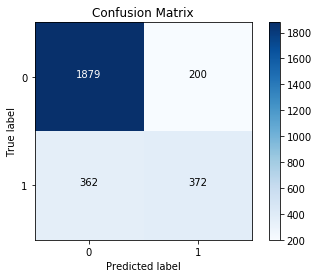

test accuracy: 0.8002132954141487
train accuracy: 0.8039819862526665
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted     0    1   All
Actual                    
0          1879  200  2079
1           362  372   734
All        2241  572  2813

test report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      2079
           1       0.65      0.51      0.57       734

    accuracy                           0.80      2813
   macro avg       0.74      0.71      0.72      2813
weighted avg       0.79      0.80      0.79      2813

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3084
           1       0.66      0.55      0.60      1135

    accuracy                           0.80      4219
   macro avg       0

<Figure size 1080x432 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

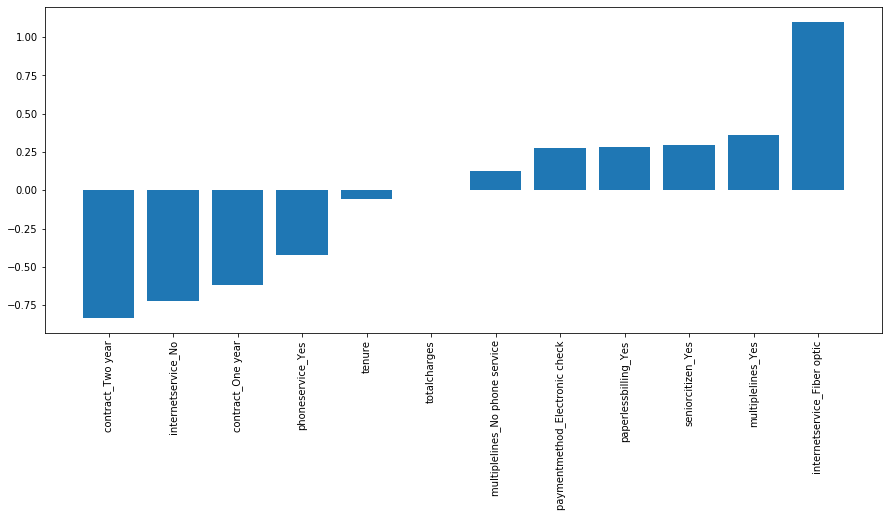

In [36]:
## Define X, y and split data into training and testing
from sklearn.model_selection import train_test_split

# Split data into X and y
y=df['churn'].copy()

# Define X

X = df.drop(columns=['churn'], axis=1)



#importing train_test_split
from sklearn.model_selection import train_test_split
# Split the data into a training and a test set and set stratify=y to help with imbalance data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,
                                                 random_state=42)



## logistic regression with sickit learn before smote
logreg = LogisticRegression()
base_log = logreg.fit(X_train, y_train)
base_log
#predictions
y_hat_train=base_log.predict(X_train)
y_hat_test = base_log.predict(X_test)

# model results

metrics(base_log, y_train, y_test, y_hat_train, y_hat_test)
# To get the  coffients of all the variables of logistic Regression
base_log_cof = pd.Series(base_log.coef_[0], index=X.columns.values)
print(base_log_cof)

base_log_cof.sort_values(inplace=True)
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
features=plt.bar(base_log_cof.index,base_log_cof.values)

##### Interpreting the Confusion Matrix

Interpreting the the Confusion Matrix results on testing data: 347 out of  734 instances which belong to class 1"churn" have been classified as class 0"not_churn". In other words,
We are classifying 47% of the churn cases as not churn. This is considered a big loss to Telco company. The higher higher recall and precision in non churn customers is not due to correct classification. The model has predicted the majority class for almost all the examples which are the Telco's customers who don't churn. And since about 75.0% of the examples actually belong to this class"not_churn", it leads to such high recall and precision  scores. To fix this issue, imbalance data must be addressed through 'smote'

#### False Negative Calculation 
The number of churn customers who have been misclassified as non churn. Having high number of False Negative will cause a big loss to Telco Company.It is considered  a priority job  to a data scientist to come up with a model that predicts very low number of false negative results.


In [ ]:
#FN percentage
347/734* 100

###### Basemodel 
Basemodel with logistic regression has an accuracy of 80.5% for training data and 80.3% for testing, The model was able to call more non churn to churn customers . Recall is more important here. The basemodel recall is 53% with false negative pecentage of 347/734 =47%. We have to decrease the FN % and increase Recall for a better model prediction. The  target is imbalanced and can be fixed through smote. I will try Hypertuning the param and and also diffirent algorithm to increase the model's performance with regards testing accuracy and recall. 

##### Imbalance Target

In [ ]:
print(f"Churn (Target) Percentage Dustribution ", "\n",round(df['churn'].value_counts(normalize=True) * 100,2))


The target variable, 'churn', is imbalanced - meaning the variable contains about 3times more “no-churn” instances than “yes-churn” instances. This can present a problem since the positive class we want to predict is the “churn” class (1.0). Because of this imbalanced data, we will make sure that both our training set and testing set maintain this ratio of yes:no churn. This is can be addressed by trying different strategies such as:
* class_weight='balanced'
* stratify='y'
* smote 

I believe smote is the most powerful, because the other above tow methods is not available with every algorithm.

The smote function was imported from the imblearn.over_sampling.



##### Using SMOTE
It has been found that balancing the data will do better classification models. We will try balancing our data using SMOTE.

In [ ]:
'''
smote
refre to install docs 
https://imbalanced-learn.readthedocs.io/en/stable/install.html
'''
from imblearn.over_sampling import SMOTE, ADASYN 

X_resampled, y_resampled = SMOTE().fit_sample(X, y) #adding more users/non-users
print(pd.Series(y_resampled).value_counts())

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=0)


In [ ]:
#  Logistic Regression after SMOTE
logreg_smote1 = LogisticRegression()
logreg_smote1.fit(X_train, y_train)

#predictions
y_hat_train = logreg_smote1.predict(X_train)
y_hat_test = logreg_smote1.predict(X_test)

# model results
metrics(logreg_smote1, y_train, y_test, y_hat_train, y_hat_test)
# To get the  coffients of all the variables of logistic Regression
logreg_smote1_cof = pd.Series(logreg_smote1.coef_[0], index=X.columns.values)
print(logreg_smote1_cof)

logreg_smote1_cof.sort_values(inplace=True)
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
plt.title(("Most Important Features according Logistic Regression Model"), fontsize = 20)
features=plt.bar(logreg_smote1_cof.index,logreg_smote1_cof.values)

In [ ]:
##Percentage of False Negative
249/1305*100

###### Smote improves the balance between  0 and one in Recall, Precision,and F1 in training and testing, and I also notice increase in recalling the one's which is custmoer churn from 53% before smote to 81% after smote and a decrease in number of False Negative percentage from 47% before smote to 19% after smote. However my model accuracy got down from  80.3% to 77.7%. These results are for my first basemodel of logistic regression with the default parameters. To get better model accuracy, and  better recall, I will start my journey of hypertuning with playing with different sets of logistic regression parameters.

In [ ]:
## after smote logistic regression with sickit learn
logreg_1 = LogisticRegression(fit_intercept = False, C = 1e15, solver='liblinear')
logreg_1.fit(X_train, y_train)

#predictions
y_hat_train=logreg_1.predict(X_train)
y_hat_test = logreg_1.predict(X_test)
# model results
metrics(logreg_1, y_train, y_test, y_hat_train, y_hat_test)

# To get the  coffients of all the variables of logistic Regression
model_log_cof = pd.Series(logreg_1.coef_[0], index=X.columns.values)
print(model_log_cof)



#model_log_cof = pd.Series(model_log_cof.coef_[0], index=X.columns.values)
model_log_cof.sort_values(inplace=True)
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
features=plt.bar(model_log_cof.index,model_log_cof.values)

All metrics showed a little  accuracy improvement. Now, I will try hypertuning with different parameters in different models through Gridsearch 

##### Trying different  models with different parameters

Since the Gridsearch is going to take too longtime to finish its search and bring up its decision with best model and best paramater, I'm going to spend this time in explaining these models and  parameters  with simple words to make it easier for anyone in the future will read my notebook.

SVM Classifier is algorithm used to separate between features through increasing the separating space, which is called the decision boundary between my features. SVM is doing this job using different methods.These methods are called Kernels. Kernels have different forms such as linear, poly, RBF. The linear Kernel is like  a line separating between the features, so the model can separate or classify between feature one and feature 2 using this line. When we do model.predict(X_test), we are telling the model to predict the values of y(churn customer) using (X feature) that has its coffient which is feature weight.As much weight we have, as much the feature will be important. Since the Kernel is linear, the prediction equation(decision function of yes churn or no churn) will be in form of y= intercept+ weight1*X1(feature_name1)+ weight2*X2(feature_name2)+....Weightn*Xn.In other words y= X.W+ b. Those Xs are features that have been standardized  using standard scaler from sickit learn which means they are in same scale of number's range.  If decsion function>0,classification will be positive(yes churn) else will be negative (not churn).  

##### Select the Best Model with the best parameters

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

######  HyperTune_one with Gridsearch_one

In [ ]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False, n_jobs=-1)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

Gridsearch shows that Random forest is the best model with cv accuracy of 82.5%. Now I will check the performance of random forest with n=10 and check overfitting, and recall.

In [ ]:
# Instantiate and fit a RandomForestClassifier with n_estimators=100
forest_1 = RandomForestClassifier(n_estimators=10)

forest_1.fit(X_train, y_train)

#predictions
y_hat_train=forest_1.predict(X_train)
y_hat_test = forest_1.predict(X_test)

# model results

metrics(forest_1, y_train, y_test, y_hat_train, y_hat_test)


With applying n-estimator=10 by itself I ran into overfitting problem so, I will do another gridsearch with more parameters

#### Hypertune_2

Trying to follow the Gridsearch best model i.e.Random forest with the best suggested parameter of number of estimators=10,I found my model ran into overfitting issue where the training accuracy is 98.1% while the testing accuracy is 84.6%. I can fix the overfitting of my model through adding more parametetrs to Randomforest which will tune my model and overcome the overfitting issue. I will run a gridsearch again with the following param

In [ ]:
rf_param = RandomForestClassifier()
param_grid = {
     'criterion':['gini','entropy'],
    'max_depth':[2,3,4,5,20],
    'min_samples_split':[5,20,50],
    'min_samples_leaf':[15,20,30],
    'n_estimators': [1,5,10]
}
gs = GridSearchCV(forest_1, param_grid, cv=3, n_jobs=-1)
gs.fit(X_train, y_train)
gs.best_params_

The Gridsearh suggests {'criterion': 'gini','max_depth': 20,'min_samples_leaf': 15 'min_samples_split': 50,'n_estimators': 10} as best parameters. So I will plug them into Randomforest and check the metrics

In [ ]:
# Instantiate and fit a RandomForestClassifier with n_estimators=100
forest_2 = RandomForestClassifier(n_estimators=10,
                                criterion= 'gini',
                                max_depth= 20,
                                min_samples_leaf= 15,
                                min_samples_split= 50)

forest_2.fit(X_train, y_train)

#predictions
y_hat_train=forest_2.predict(X_train)
y_hat_test = forest_2.predict(X_test)

# model results

metrics(forest_2, y_train, y_test, y_hat_train, y_hat_test)
# To get the feature importance
feature_important=forest_2.feature_importances_
# Plot features importances
imp = pd.Series(data=forest_2.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.style.use('dark_background')
plt.figure(figsize=(10,12))
plt.title("Feature importance of Random Forest model")
ax = sns.barplot(y=imp.index, x=imp.values, palette="RdBu")


###### Interpreting Confusion Matrix(TN,FP,FN,TP) with Percentages

In [ ]:
# percentage of misclassified customers as False negatived 
print('percentage of misclassified customers as not churn (FN):',np.round(184/1305* 100,3))

print('percentage of misclassified customers as churn (FP):',np.round(214 / 1277* 100))
print('percentage of correct classified customers as not churn (TN):',np.round(1063/1277 *100))
print('percentage of correct classified customers as yes churn (TP):',np.round(1121/ 1305 *100)


###### Trying the suggested best parameters above, I got better model testing and training accuracy of 86%. The recall of churnned customer is 86% also. I have  precision, recall, and F1 balance between not churn and yes churn with percentage of  about 86%. The False negative percentage in this model is 14%. I think this is a good model and I will trust it to make my prediction of churn customers


##### ROC Curve for Random Forest Classifier 

In [ ]:
from sklearn.metrics import roc_curve, auc

y_score_test = forest.predict(X_test)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_score_test)

y_score_train = forest.predict(X_train)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_score_train)

# Train AUC
print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

plt.figure(figsize=(10,8))
lw = 2
plt.style.use('fivethirtyeight')

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The ROC plot shows the true positive rate( the rate that my model predicts the number of customers churnned  to the true churnned  customers) against the false positive rate where my model predicts the number of customers are churnned but the truth they don't churn.The further  the curve is away from the middle line and closer to the top left corner,the better this model precision is.  AUC  is a metric of the model's accuracy and  closer to one is better and closer to 0.5 is bad. Because 0.5 means the model can't differentiate between positive and negative which means the model failed to  make a prediction of whether customer churn or not


##### Random Forest Tuning through pipeline
Random Forests is a form of  bagging class that is built on a large collection of trees which is  called number of  esimators, the Random forest decision(yes churn) is built on taking the average of these trees.
Now, I will go further steps to do more gridsearch of randomfoest through pipline as an estimator to gridsearch, and random forest is going to be an estimator to pipeline to see if I can  get more metrics improvement,and also to avoid data leakage.


In [ ]:
#instantiate the pipeline
pipe = Pipeline([('classifier', RandomForestClassifier(random_state=123))])
params={'criterion':['gini','entropy'],
    'max_depth':[2,3,4,5,7,20],
    'min_samples_split':[1,2,5,9,20,50],
    'min_samples_leaf':[1,2,3,5,15,20],
    'n_estimators':[10, 20, 50, 100, 150, 200]}
clf = GridSearchCV(estimator= pipe, param_grid=grid, cv=5, scoring='roc_auc', n_jobs=-1 )
clf.fit(X_train, y_train)
y_hat_train = clf.predict(X_train)
y_hat_test = clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
clf.best_params_

The accuracy score of Gridsearch is pretty high with 93.4% for training and 93.1% for testing. The gridsearch predicts the following parameter as the best parameters for randforest as follows:
class_weight= 'balanced',criterion= 'entropy',max_depth= 7,min_samples_leaf= 2,min_samples_split= 10,n_estimators= 200. Now, I will plug them again into randomforest and check the metrics.

In [ ]:
# Instantiate and fit a RandomForestClassifier with n_estimators=100
forest_3 = RandomForestClassifier(n_estimators=200,
                                criterion= 'entropy',
                                max_depth= 7,
                                min_samples_leaf= 2,
                                min_samples_split= 10,
                                class_weight= 'balanced')

forest_3.fit(X_train, y_train)

#predictions
y_hat_train=forest_3.predict(X_train)
y_hat_test = forest_3.predict(X_test)

# model results

metrics(forest_3, y_train, y_test, y_hat_train, y_hat_test)
# To get the feature importance
feature_important=forest_3.feature_importances_
# Plot features importances
imp = pd.Series(data=forest_3.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance of Random Forest model")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d")


In [ ]:
## False Negative percentage
158/1305*100

In [24]:
## Plotting ROC Curve
from sklearn.metrics import roc_curve, auc

y_score_test = forest_3.predict(X_test)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_score_test)

y_score_train = forest_3.predict(X_train)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_score_train)

# Train AUC
print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

plt.figure(figsize=(10,8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

NameError: name 'forest_3' is not defined

###### SVM classifier 
Since the Gridsearch suggested SVM as a good classifier with accuracy of 80%, I will try to hypertune it more so I might be able to improve the results.

#### Modeling with Ensemble Methods

 Ensemble Learning:
 
 ###### Bagging and Boosting
Next, We will try modeling with Ensemble methods, and show the strength of using these powerful methods.
I will look for feature importance and improve the accuracy of my ensembled models through tuning hyperparameters.


Ensemble models are combination of simple models working together to make a prediction.

• It can be broken down into two tasks:
1. Develop a population of base learners
2. Combine them to form a composite predictor

##### Conclusion

Research in predicting customer churn has proved it is very important and it adds an income to Telecom companies.As we can see, some variables are negatively correlated with the predicted target (Churn), while some others behave positively. Negative correlation means that  churn decreases  when variable increases. 

tenure is the most important feature for prediction and it has most negative correlation, so when tenure increases, 

churn decreases, monthly charges is the second important feature, and as monthly charges increase, churn decrease

then internetservice_Fiber optic is the third important feature but it has a positive correlation  so as  

internetservice_Fiber optic increases,churn increases 

totalcharges is the forth important feature and it has positive effect. As  totalcharges increase, churn increases                           
contract_Two year is the fifth important feature and it has negative effect, so as  contract_Two year increase, churn decreases                           

As we have seen in our EDA, having a 2 year contract reduces chances of churn. 2 year contract along with tenure have the most negative relation with Churn as predicted by logistic regressions. Total charges, fibre optic internet services and seniority can lead to higher churn rates. This is interesting because although fibre optic services are faster, customers are likely to churn because of it. I don't understad why this is happening.

Till the time let's have a look at other algorithms.

###### XGBoost

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
clf_xgb = XGBClassifier()
param_grid = {
    "learning_rate": [0.1,0.2,0.5,0.9],
    'max_depth': [3, 9, 12],
    'min_child_weight': [10, 18],
    'subsample': [0.3, 0.9],
    'n_estimators': [5, 30, 100, 150],
    'nthread' : [-1],
}
grid_clf = GridSearchCV(clf_xgb, param_grid, scoring='recall', cv=5, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

y_hat_train = grid_clf.predict(X_train)
y_hat_test= grid_clf.predict(X_test)
metrics(grid_clf, y_train, y_test, y_hat_train, y_hat_test)
train_accuracy=recall_score(y_train, y_hat_train)
test_accuracy = recall_score(y_test, y_hat_test)
print("")
print("Training recall: {:.4}%".format(train_accuracy * 100))
print("Test recall: {:.4}%".format(test_accuracy * 100))

##### Conclusion
In conclusion, based on our EDA, We can see the more servises are added the less people churn. Gender is not a feature, phone service and multipleline arn't important.

###### List of important features are :
seniorcitizen,partner,dependents,internetservice,contract,paperlessbilling, paymentmethod,Totalcharges and Tenure. 



###### Important Questions are: 
Q1: What percentage of customers churn?

Q2: What are common variables among churn customers?

Q3: What is the predicted percentage of customer churn?

Q4:  How to reduce customer churn?

